In [2]:
from flightForge import Environment, Motor, Rocket, Simulation, LivePlotter, Parachute
from dotenv import load_dotenv
import os
import datetime

-------ENVIRONMENT INFO --------
Coordinates:   39.3897, -8.288964
Model Used:    gfs
Surface Wind:  U=2.20 m/s, V=0.86 m/s
               Mag=2.36 m/s
--------------------------------


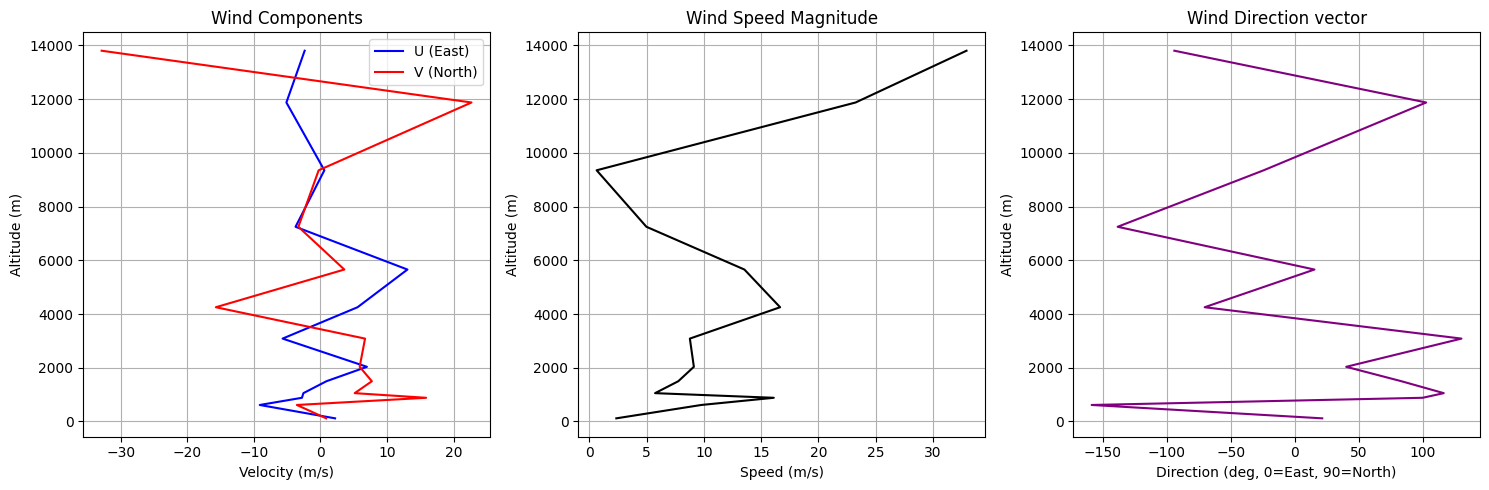

In [3]:
load_dotenv()
api_key = os.environ.get("API_KEY")
env = Environment(e_log=True)
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
date_info = (tomorrow.day, tomorrow.month, tomorrow.year)
env.set_model(api_key=api_key, model="gfs", lat=39.389700, lon=-8.288964, date=date_info)

In [9]:
motor = Motor("curves/thrust(2).csv", burn_time=4.2, ox_mass=7.33, ox_mdot=1.5, grain_mass=3, e_log=True)

-------Hybrid MOTOR INFO --------
Oxidizer Mass: 7.33 kg
Grain Mass:    3 kg
Total Impulse: 14543.04 Ns
Eff. Exhaust Velocity (Ve): 1407.84 m/s
------------------------------------


In [8]:
rocket = Rocket(40.8, "curves/MaCd.csv", 0.163)
rocket.add_parachute(Parachute("drogue", 0.7354, 1, "apogee"))
rocket.add_parachute(Parachute("main", 13.8991, 1, 450))
rocket.add_motor(motor)

In [6]:
sim = Simulation(env, rocket, 12, 84, 144, e_log=True) 

-------------------------------------------
Event rail_departure occurred at 0.78 s.
rail_departure conditions:
(x, y, z) = (-1.01, 0.74, 11.93) [m]
(vx, vy, vz) = (-3.11, 2.26, 36.53) [m/s]
mass = 49.54 kg
-------------------------------------------
-------------------------------------------
Event burn_out occurred at 4.20 s.
burn_out conditions:
(x, y, z) = (-64.52, 12.28, 505.24) [m]
(vx, vy, vz) = (-35.39, 6.94, 258.00) [m/s]
mass = 41.01 kg
-------------------------------------------
drogue parachute deployed at: 26.56 [s]
-------------------------------------------
Event apogee occurred at 26.56 s.
apogee conditions:
(x, y, z) = (-721.07, 149.08, 3224.87) [m]
(vx, vy, vz) = (-25.53, 5.37, 0.00) [m/s]
mass = 40.99 kg
-------------------------------------------
main parachute deployed at: 115.19 [s]
-------------------------------------------
Event impact occurred at 180.03 s.
impact conditions:
(x, y, z) = (-320.77, 97.87, 0.00) [m]
(vx, vy, vz) = (0.86, 2.20, -6.70) [m/s]
mass =

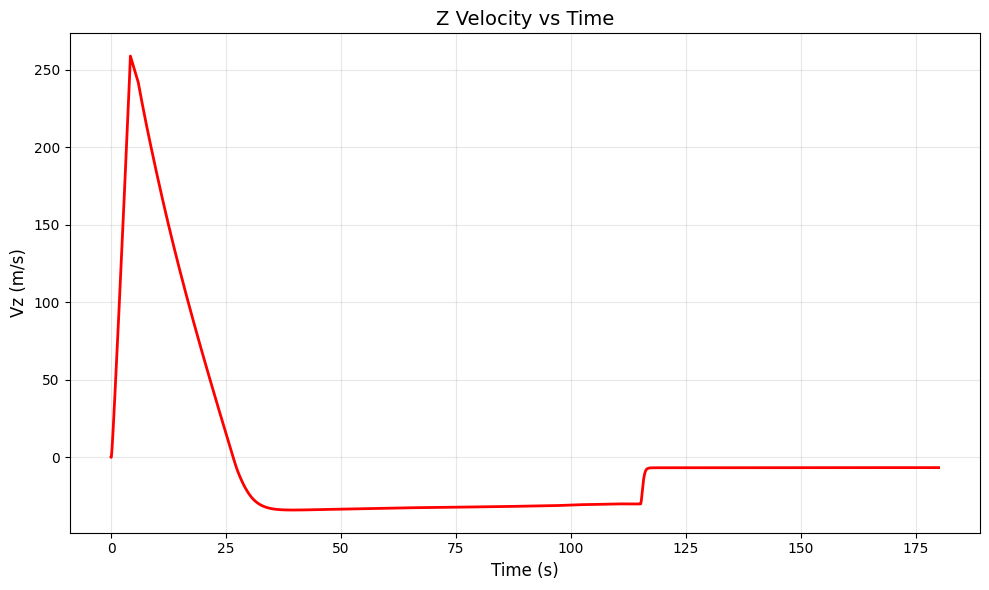

In [7]:
sim.results.vz()

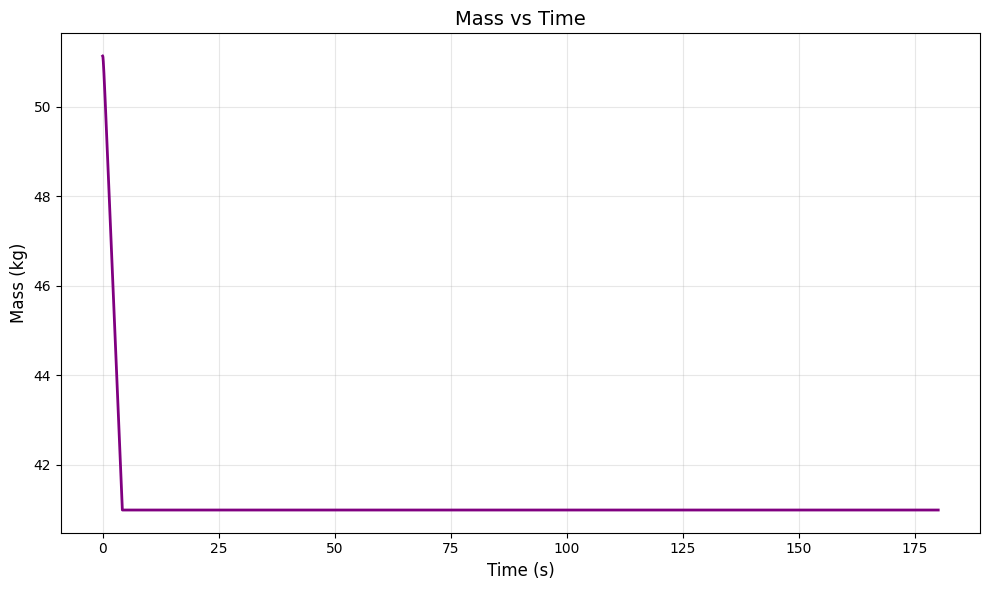

In [10]:
sim.results.m()

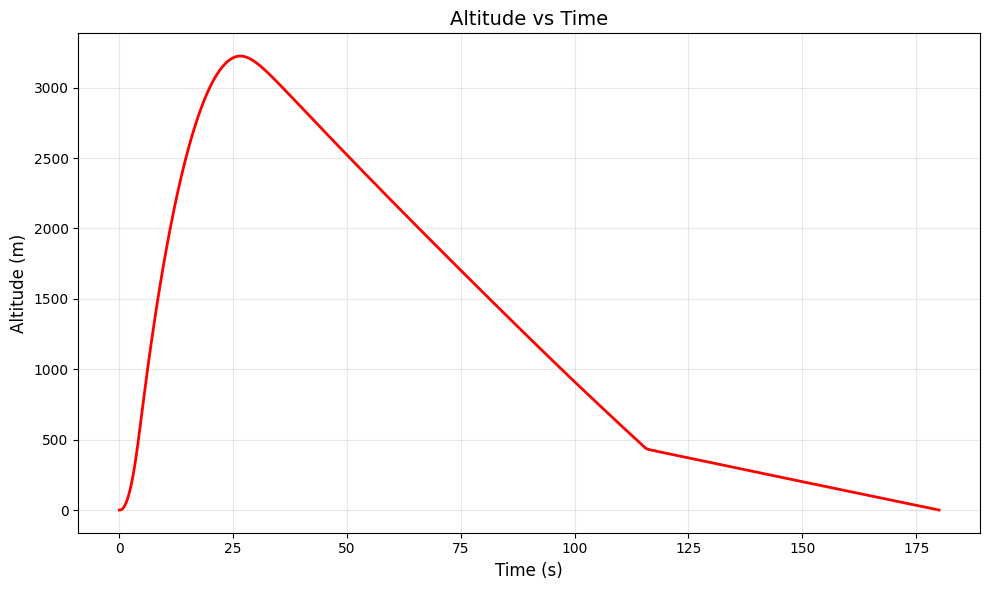

In [11]:
sim.results.z()